In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn

In [3]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

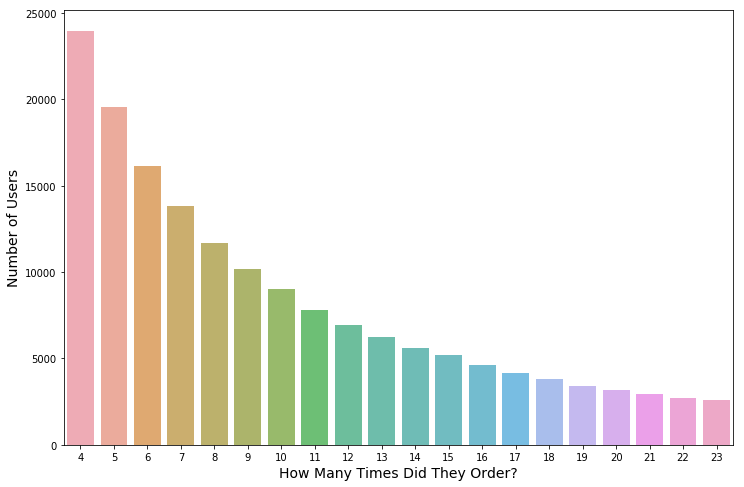

In [5]:
def get_unique_count(x):
    return len(np.unique(x))


cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
cnt_srs = cnt_srs.nlargest(20)

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Users', fontsize=14)
plt.xlabel('How Many Times Did They Order?', fontsize=14)
plt.xticks(rotation='horizontal')
plt.show()

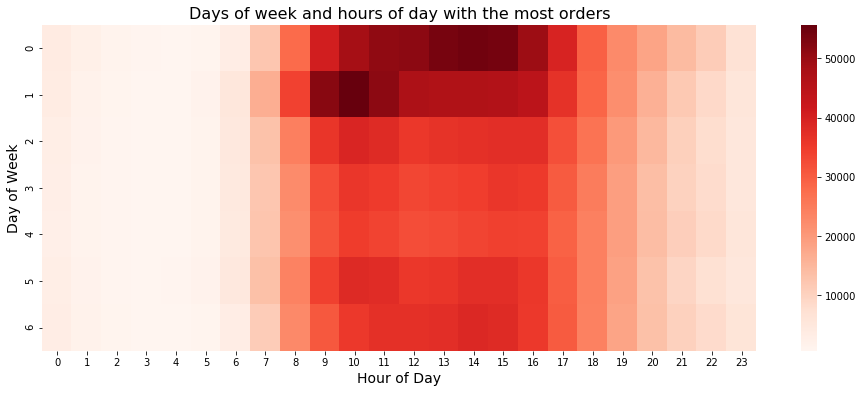

In [6]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(16,6))
sns.heatmap(grouped_df,  cmap='Reds')
plt.ylabel('Day of Week', fontsize=14)
plt.xlabel('Hour of Day', fontsize=14)
plt.title("Days of week and hours of day with the most orders", fontsize=16)
plt.show()

In [7]:
print('percentage of reordered products')
print(round(order_products_prior_df.reordered.sum() / float(order_products_prior_df.shape[0]),4)*100, '%')

percentage of reordered products
58.97 %


In [8]:
print('orders with reordered products')
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

orders with reordered products


1    0.879151
0    0.120849
Name: reordered, dtype: float64

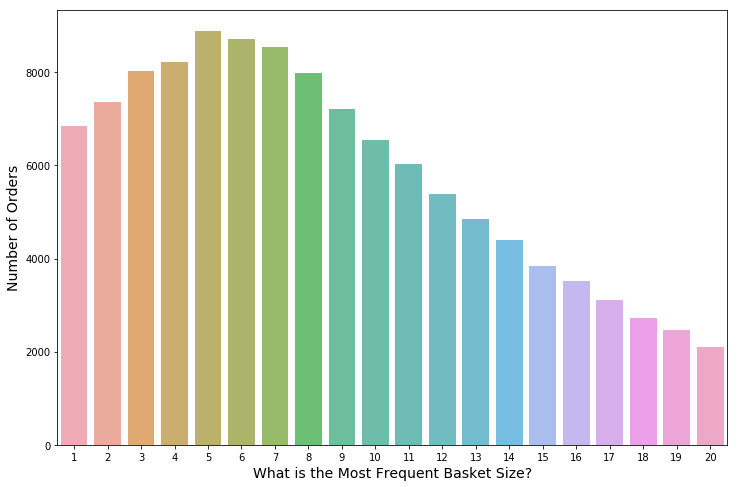

In [9]:


grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()
cnt_srs = cnt_srs.nlargest(20)

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('What is the Most Frequent Basket Size?', fontsize=14)
plt.xticks(rotation='horizontal')
plt.show()



In [10]:


print ('Merge products with prior orders')
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id')
order_products_prior_df.head()



Merge products with prior orders


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs


Most frequently bought products


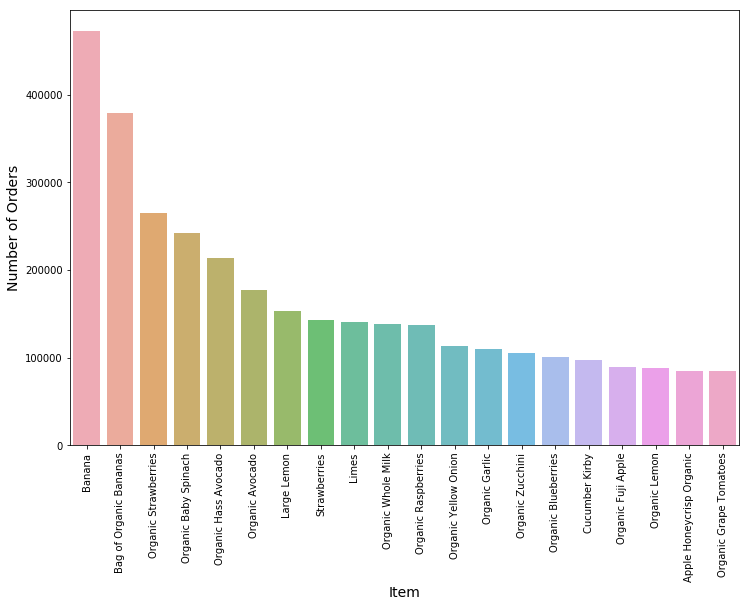

In [21]:
print('Most frequently bought products')
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.product_name, cnt_srs.frequency_count, alpha=0.8)
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('Item', fontsize=14)
plt.xticks(rotation=90)
plt.show()

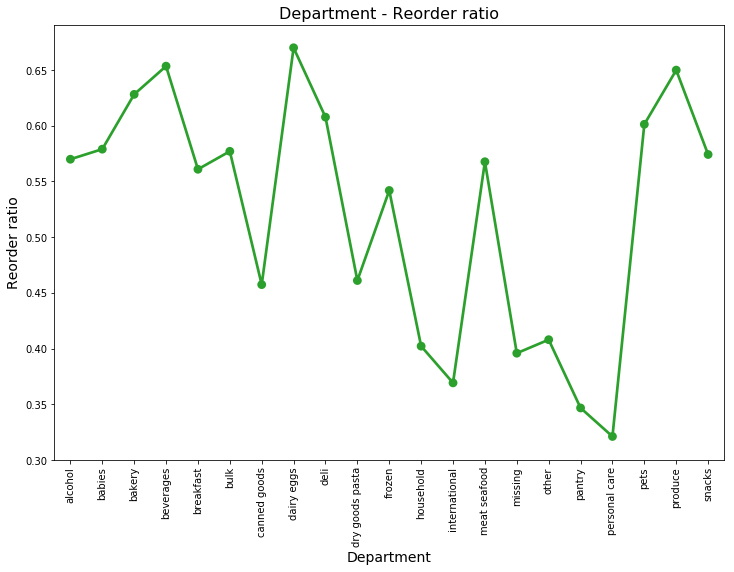

In [25]:


grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Department', fontsize=14)
plt.title("Department - Reorder ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.show()



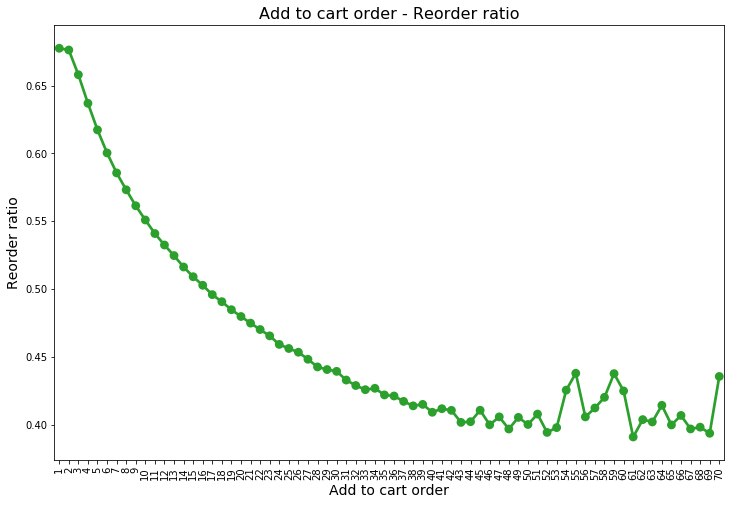

In [27]:
order_products_prior_df["add_to_cart_order"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order"].loc[order_products_prior_df["add_to_cart_order"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=14)
plt.xlabel('Add to cart order', fontsize=14)
plt.title("Add to cart order - Reorder ratio", fontsize=16)
plt.xticks(rotation='vertical')
plt.show()